# Support Vector Machines Study
This notebook will be used to study how well Support Vector Machines perform in the easily created representation provided by SLM. 


In [1]:
import numpy as np
import h5py
from sklearn import svm, cross_validation, preprocessing

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#### Now we load the data

In [2]:
# First we load the file 
file_location = '../results_database/text_wall_street_big.hdf5'
run_name = '/low-resolution'
f = h5py.File(file_location, 'r')


# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

# Nexa parameters
Nspatial_clusters = 5
Ntime_clusters = 15
Nembedding = 3

parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]

# We need to exctrat the SLM
SLM = np.array(f[run_name]['SLM'])

## Number of data requiered for good predictions.
First let's see how much data we actually require to make good predictions using both a linear and an RBF kernel for a support vector machine.

In [3]:
number_of_data = np.logspace(2, 3.5, 10, dtype='int')
delay = 5
cache_size = 5000

accuracy_linear = []
accuracy_rbf = []
accuracy_linear_std = []
accuracy_rbf_std = []

In [4]:
for N in number_of_data:
    # Standarized
    X = SLM[:,:(N - delay)].T
    y = letters_sequence[delay:N]

    # We now scale X
    X = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = svm.SVC(C=1.0, cache_size=cache_size, kernel='linear')
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    accuracy_linear_std.append(score)

    clf_rbf = svm.SVC(C=1.0, cache_size=cache_size, kernel='rbf')
    clf_rbf.fit(X_train, y_train)
    score = clf_rbf.score(X_test, y_test) * 100.0
    accuracy_rbf_std.append(score)
    
    # Not standarized
    X = SLM[:,:(N - delay)].T
    y = letters_sequence[delay:N]

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = svm.SVC(C=1.0, cache_size=cache_size, kernel='linear')
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    accuracy_linear.append(score)

    clf_rbf = svm.SVC(C=1.0, cache_size=cache_size, kernel='rbf')
    clf_rbf.fit(X_train, y_train)
    score = clf_rbf.score(X_test, y_test) * 100.0
    accuracy_rbf.append(score)
    
    print(N)

100
146
215
316
464
681
1000
1467
2154
3162


#### Plot it

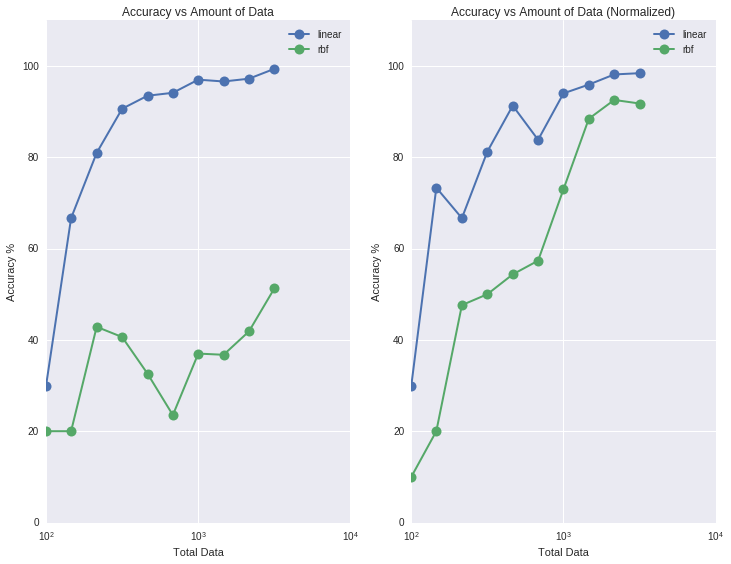

In [5]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(number_of_data, accuracy_linear, 'o-', lw=2, markersize=10, label='linear')
ax1.plot(number_of_data, accuracy_rbf, 'o-', lw=2, markersize=10, label='rbf')
ax1.set_xlabel('Total Data')
ax1.set_ylabel('Accuracy %')
ax1.set_title('Accuracy vs Amount of Data')
ax1.set_ylim([0, 110])
ax1.set_xscale('log')
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(number_of_data, accuracy_linear_std, 'o-', lw=2, markersize=10, label='linear')
ax2.plot(number_of_data, accuracy_rbf_std, 'o-', lw=2, markersize=10, label='rbf')
ax2.set_xlabel('Total Data')
ax2.set_ylabel('Accuracy %')

ax2.set_title('Accuracy vs Amount of Data (Normalized)')
ax2.set_ylim([0, 110])
ax2.set_xscale('log')
ax2.legend()


## Latency analysis for SMVs

In [6]:
delays = np.arange(0, 10)
N = 1000
accuracy_lattency = []

In [7]:
for delay in delays:
    # Standarized
    print(delay)
    X = SLM[:,:(N - delay)].T
    y = letters_sequence[delay:N]

    # We now scale X
    X = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = svm.SVC(C=1.0, cache_size=cache_size, kernel='linear')
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    accuracy_lattency.append(score)

0
1
2
3
4
5
6
7
8
9


#### Plot it

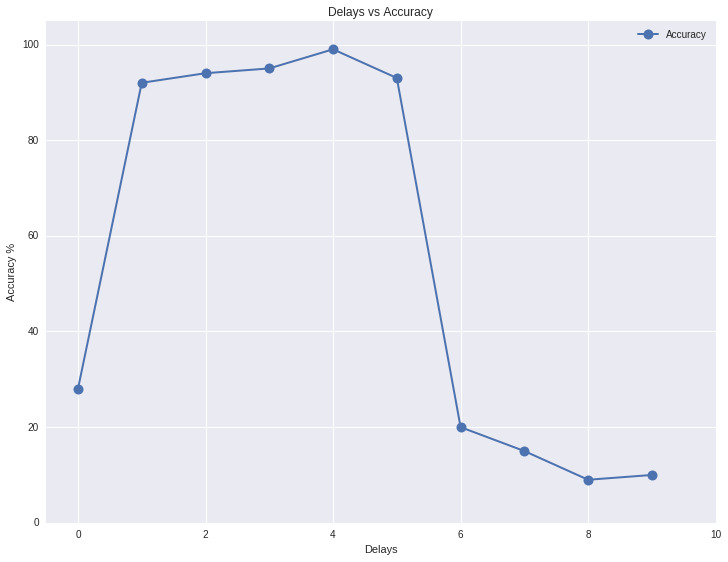

In [8]:
plt.plot(delays, accuracy_lattency, 'o-', lw=2, markersize=10., label='Accuracy')
plt.xlabel('Delays')
plt.ylim([0, 105])
plt.xlim([-0.5, 10])
plt.ylabel('Accuracy %')
plt.title('Delays vs Accuracy')
fig = plt.gcf()
fig.set_size_inches((12, 9))
plt.legend()